In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
import pickle

## Carga de datos train

In [2]:
# Carga de datos procesados y separados para entrenar modelos

df = pd.read_csv("../data/train/train.csv")
df.head()

,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Diagnosis
0,4.862270,2.471408,0,0,9.788456,0
1,28.316033,5.021810,0,0,2.873132,0
2,27.204428,3.819500,1,0,2.150132,0
3,6.177355,0.036686,0,0,2.570051,1
4,6.847389,9.246352,1,0,1.814942,1


In [3]:
X_train = df.drop(["Diagnosis"], axis=1)
y_train = df["Diagnosis"]

## Entrenamiento de modelos

### Prueba con Decision Tree Classifier y GridSearch

In [4]:
# modelo DecisionTreeClassifier con random state 11 y parametros para el GridSearch de max_depth [2,3,4]
dt = DecisionTreeClassifier(random_state=11)
parametros= {"max_depth": [2, 3, 4]}

gs_dt = GridSearchCV(estimator=dt, param_grid=parametros, scoring="recall", cv=3, verbose=3, n_jobs=-1) # GridSearch con scoring recall, cv 3 y verbose de 3
gs_dt.fit(X_train,y_train)

print("Mejor estimator:", gs_dt.best_estimator_) # mejor combinación de DecisionTree
print("Mejor parametro:", gs_dt.best_params_) # mejores parámetros despues del GS
print("Mejor recall:", gs_dt.best_score_) # mejor recall después del GS

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Mejor estimator: DecisionTreeClassifier(max_depth=4, random_state=11)
Mejor parametro: {'max_depth': 4}
Mejor recall: 0.8547854785478548


## Carga de datos test

In [5]:
df_test = pd.read_csv("../data/test/test.csv")

In [6]:
X_test = df_test.drop(["Diagnosis"], axis=1)
y_test = df_test["Diagnosis"]

In [ ]:
pred_dt = gs_dt.best_estimator_.predict(X_test) # Predicción de datos test
scores = gs_dt.best_estimator_.predict_proba(X_test)[:,1] # guardado en variable scores el predict_proba del best_estimator para poder ver el AUC

print("Recall:", recall_score(y_test, pred_dt)) # Resultado del recall
print("Accuracy:", accuracy_score(y_test, pred_dt)) # Resultado del accuracy
print("AUC:", roc_auc_score(y_test, scores)) # Resultado de roc_auc
print("CM:", confusion_matrix(y_test, pred_dt)) # Resultafo de la matriz de confusión
print("Report:", classification_report(y_test, pred_dt)) # Vemos el reporte completo

Recall: 0.8961038961038961
Accuracy: 0.9302325581395349
AUC: 0.9484872012045925
CM: [[262  14]
 [ 16 138]]
Report:               precision    recall  f1-score   support

           0       0.94      0.95      0.95       276
           1       0.91      0.90      0.90       154

    accuracy                           0.93       430
   macro avg       0.93      0.92      0.92       430
weighted avg       0.93      0.93      0.93       430



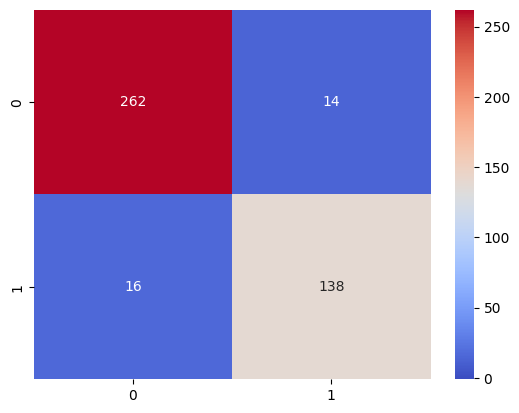

In [8]:
# Mapa de calor con la matriz de consufión para mejor visualización de la misma

sns.heatmap(confusion_matrix(y_test, pred_dt), annot=True, vmin=-1, fmt="d", cmap="coolwarm");

Guardado de modelo con pickle

In [ ]:
pickle.dump(gs_dt.best_estimator_, open("../models/modelos_probados/02_modelo_dt.pkl", "wb"))